# 1.この課題の目的
オブジェクト指向を意識した実装に慣れる
数式をコードに落とし込めるようにする
スクラッチを通して線形回帰を理解する
基本的な機械学習のキーワードを学習する
以下の要件をすべて満たしていた場合、合格とします。

※Jupyter Notebookを使い課題に沿った検証や説明ができている。

# 2.スクラッチによる実装
NumPyなど最低限のライブラリのみを使いアルゴリズムを実装していきます。

# 【問題1】線形回帰のクラスを作成する
線形回帰のクラスを作成し、Sprint2で作成した回帰のパイプラインに組み込んでください。

以下が雛形です。ここにメソッドを加えていってください。メソッドやパラメータなどはscikit-learnを参考にしてください。

sklearn.linear_model.LinearRegression — scikit-learn 0.20.0 documentation

検証段階ではJupyter Notebook上で書いていき、最終的にはpyファイルにモジュールとしてまとめてください。

In [1]:
"""
class ScratchLinearRegression():

    線形回帰のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      学習用データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証用データに対する損失の記録

    

    def __init__(self, num_iter, lr, bias, verbose):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)

    def fit(self, X, y, X_val=None, y_val=None):
        
        線形回帰を学習する。検証用データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            学習用データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証用データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証用データの正解値
        

        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print()
        pass


    def predict(self, X):
        
        線形回帰を使い推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            線形回帰による推定結果
        

        pass
        return
""";

## 仮定関数
以下の数式で表される線形回帰の仮定関数を実装します。

$$h_0(x)=\theta_0x_0+\theta_1x_1+...+ \theta_j x_j+x_1+...+\theta_nx_n.(x_0=1)$$

$x$
 : 特徴量ベクトル

$\theta$
 : パラメータベクトル

$n$
 : 特徴量の数

$x_j$
 : j番目の特徴量

$\theta_j$
 : j番目のパラメータ（重み）

特徴量の数
n
が任意の値に対応できる実装にする。

なお、ベクトル形式で表すと以下のようになる。

$$h_0(x)=\theta^T.x.$$

以下の雛形を参考にScratchLinearRegressionクラスへメソッドを追加してください。Pythonではクラスの外から呼び出すことがないメソッドにはアンダースコアを先頭にひとつつける慣例があります。

In [2]:
"""
def _linear_hypothesis(self, X):
    線形の仮定関数を計算する

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      学習データ

    Returns
    -------
      次の形のndarray, shape (n_samples, 1)
      線形の仮定関数による推定結果

    pass
    return
""";

## 最急降下法
最急降下法により学習させます。j番目のパラメータの更新式は以下のようになります。

$$\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^{m}[(h_\theta(x^{(i)}) - y^{(i)} )x_{j}^{(i)}]$$

$\alpha$
 : 学習率

$i$
 : サンプルのインデックス

$j$
 : 特徴量のインデックス

ScratchLinearRegressionクラスへメソッドを追加してください。これまでの雛形を参考にコメントアウト部分の説明も記述してください。

In [3]:
"""
def _gradient_descent(self, X, error):
    説明を記述
    pass
""";

雛形を用意したメソッドや関数以外でも必要があれば各自作成して、スクラッチによる実装を完成させてください。必要があれば雛形を外れても問題ありません。

In [4]:
# 各クラスをインポート
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 作成したロジスティック回帰モデルをインポート
from ScratchLinearRegression import ScratchLinearRegression

In [5]:
# train.csvをデータフレーム形式で読み込んで表示
df = pd.read_csv('train.csv') 
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
# 特徴量GrLivAreaとYearBuilt の列のみ抽出
X_df = df.loc[: , ['GrLivArea', 'YearBuilt']]
X_df.head()

,GrLivArea,YearBuilt
0,1710,2003
1,1262,1976
2,1786,2001
3,1717,1915
4,2198,2000


In [7]:
# 目的変数列SalePrice列をnumpy配列に変換し、reshapeメソッドで1460行１列に変換
y = df.loc[:,'SalePrice']
y
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [8]:
# train_test_splitメソッドにてデータを学習データとテストデータに分割　学習データは75%で設定
X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size = 0.5, random_state = 0)

In [9]:
clf = ScratchLinearRegression(num_iter=2000, lr=0.0000000001, bias=True, verbose=False)

In [10]:
clf.fit(X_train, y_train, X_test, y_test)

fitメソッド↓
y_pred.shape : (730, 1)

error.shape : (730, 1)

gradient_descentメソッド

len(X) : 730

self.lr : 1e-10
np.sum(error * X) : -305748059097.3927

self.lr / len(X) : 1.36986301369863e-13
更新前のself.coef : [[0.5488135 ]
 [0.71518937]]
更新後のself.coef : [[0.5906968 ]
 [0.75707266]]

gradient_descentメソッド終了

X : [[1144 1961]
 [1797 2006]
 [1224 1962]
 [1865 2000]
 [1056 1958]]

self.coef : [[0.5906968 ]
 [0.75707266]]

fitメソッド↓
y_pred.shape : (730, 1)

error.shape : (730, 1)

gradient_descentメソッド

len(X) : 730

self.lr : 1e-10
np.sum(error * X) : -325538512198.57263

self.lr / len(X) : 1.36986301369863e-13
更新前のself.coef : [[0.5906968 ]
 [0.75707266]]
更新後のself.coef : [[0.63529112]
 [0.80166698]]

gradient_descentメソッド終了

X : [[1144 1961]
 [1797 2006]
 [1224 1962]
 [1865 2000]
 [1056 1958]]

self.coef : [[0.63529112]
 [0.80166698]]

fitメソッド↓
y_pred.shape : (730, 1)

error.shape : (730, 1)

gradient_descentメソッド

len(X) : 730

self.lr : 1e-10
np.sum(error * X) : -346574895295.9916

self.lr / len


self.lr / len(X) : 1.36986301369863e-13
更新前のself.coef : [[52.96575465]
 [53.13213051]]
更新後のself.coef : [[52.98087403]
 [53.14724989]]

gradient_descentメソッド終了

X : [[1144 1961]
 [1797 2006]
 [1224 1962]
 [1865 2000]
 [1056 1958]]

self.coef : [[52.98087403]
 [53.14724989]]

fitメソッド↓
y_pred.shape : (730, 1)

error.shape : (730, 1)

gradient_descentメソッド

len(X) : 730

self.lr : 1e-10
np.sum(error * X) : -103106845898.20093

self.lr / len(X) : 1.36986301369863e-13
更新前のself.coef : [[52.98087403]
 [53.14724989]]
更新後のself.coef : [[52.99499826]
 [53.16137412]]

gradient_descentメソッド終了

X : [[1144 1961]
 [1797 2006]
 [1224 1962]
 [1865 2000]
 [1056 1958]]

self.coef : [[52.99499826]
 [53.16137412]]

fitメソッド↓
y_pred.shape : (730, 1)

error.shape : (730, 1)

gradient_descentメソッド

len(X) : 730

self.lr : 1e-10
np.sum(error * X) : -96316579790.92102

self.lr / len(X) : 1.36986301369863e-13
更新前のself.coef : [[52.99499826]
 [53.16137412]]
更新後のself.coef : [[53.00819231]
 [53.17456817]]

gradient_descen

self.coef : [[53.19445733]
 [53.36083319]]

fitメソッド↓
y_pred.shape : (730, 1)

error.shape : (730, 1)

gradient_descentメソッド

len(X) : 730

self.lr : 1e-10
np.sum(error * X) : -38630759.00994873

self.lr / len(X) : 1.36986301369863e-13
更新前のself.coef : [[53.19445733]
 [53.36083319]]
更新後のself.coef : [[53.19446262]
 [53.36083849]]

gradient_descentメソッド終了

X : [[1144 1961]
 [1797 2006]
 [1224 1962]
 [1865 2000]
 [1056 1958]]

self.coef : [[53.19446262]
 [53.36083849]]

fitメソッド↓
y_pred.shape : (730, 1)

error.shape : (730, 1)

gradient_descentメソッド

len(X) : 730

self.lr : 1e-10
np.sum(error * X) : -36066793.35638428

self.lr / len(X) : 1.36986301369863e-13
更新前のself.coef : [[53.19446262]
 [53.36083849]]
更新後のself.coef : [[53.19446756]
 [53.36084343]]

gradient_descentメソッド終了

X : [[1144 1961]
 [1797 2006]
 [1224 1962]
 [1865 2000]
 [1056 1958]]

self.coef : [[53.19446756]
 [53.36084343]]

fitメソッド↓
y_pred.shape : (730, 1)

error.shape : (730, 1)

gradient_descentメソッド

len(X) : 730

self.lr : 1e-1


gradient_descentメソッド終了

X : [[1144 1961]
 [1797 2006]
 [1224 1962]
 [1865 2000]
 [1056 1958]]

self.coef : [[53.19453706]
 [53.36091292]]

fitメソッド↓
y_pred.shape : (730, 1)

error.shape : (730, 1)

gradient_descentメソッド

len(X) : 730

self.lr : 1e-10
np.sum(error * X) : -985.738037109375

self.lr / len(X) : 1.36986301369863e-13
更新前のself.coef : [[53.19453706]
 [53.36091292]]
更新後のself.coef : [[53.19453706]
 [53.36091292]]

gradient_descentメソッド終了

X : [[1144 1961]
 [1797 2006]
 [1224 1962]
 [1865 2000]
 [1056 1958]]

self.coef : [[53.19453706]
 [53.36091292]]

fitメソッド↓
y_pred.shape : (730, 1)

error.shape : (730, 1)

gradient_descentメソッド

len(X) : 730

self.lr : 1e-10
np.sum(error * X) : -920.313720703125

self.lr / len(X) : 1.36986301369863e-13
更新前のself.coef : [[53.19453706]
 [53.36091292]]
更新後のself.coef : [[53.19453706]
 [53.36091292]]

gradient_descentメソッド終了

X : [[1144 1961]
 [1797 2006]
 [1224 1962]
 [1865 2000]
 [1056 1958]]

self.coef : [[53.19453706]
 [53.36091292]]

fitメソッド↓
y_pre


gradient_descentメソッド終了

X : [[1144 1961]
 [1797 2006]
 [1224 1962]
 [1865 2000]
 [1056 1958]]

self.coef : [[53.19453706]
 [53.36091292]]

fitメソッド↓
y_pred.shape : (730, 1)

error.shape : (730, 1)

gradient_descentメソッド

len(X) : 730

self.lr : 1e-10
np.sum(error * X) : -0.06158447265625

self.lr / len(X) : 1.36986301369863e-13
更新前のself.coef : [[53.19453706]
 [53.36091292]]
更新後のself.coef : [[53.19453706]
 [53.36091292]]

gradient_descentメソッド終了

X : [[1144 1961]
 [1797 2006]
 [1224 1962]
 [1865 2000]
 [1056 1958]]

self.coef : [[53.19453706]
 [53.36091292]]

fitメソッド↓
y_pred.shape : (730, 1)

error.shape : (730, 1)

gradient_descentメソッド

len(X) : 730

self.lr : 1e-10
np.sum(error * X) : -0.05792236328125

self.lr / len(X) : 1.36986301369863e-13
更新前のself.coef : [[53.19453706]
 [53.36091292]]
更新後のself.coef : [[53.19453706]
 [53.36091292]]

gradient_descentメソッド終了

X : [[1144 1961]
 [1797 2006]
 [1224 1962]
 [1865 2000]
 [1056 1958]]

self.coef : [[53.19453706]
 [53.36091292]]

fitメソッド↓
y_pre

fitメソッド↓
y_pred.shape : (730, 1)

error.shape : (730, 1)

gradient_descentメソッド

len(X) : 730

self.lr : 1e-10
np.sum(error * X) : -0.02349853515625

self.lr / len(X) : 1.36986301369863e-13
更新前のself.coef : [[53.19453706]
 [53.36091292]]
更新後のself.coef : [[53.19453706]
 [53.36091292]]

gradient_descentメソッド終了

X : [[1144 1961]
 [1797 2006]
 [1224 1962]
 [1865 2000]
 [1056 1958]]

self.coef : [[53.19453706]
 [53.36091292]]

fitメソッド↓
y_pred.shape : (730, 1)

error.shape : (730, 1)

gradient_descentメソッド

len(X) : 730

self.lr : 1e-10
np.sum(error * X) : -0.02349853515625

self.lr / len(X) : 1.36986301369863e-13
更新前のself.coef : [[53.19453706]
 [53.36091292]]
更新後のself.coef : [[53.19453706]
 [53.36091292]]

gradient_descentメソッド終了

X : [[1144 1961]
 [1797 2006]
 [1224 1962]
 [1865 2000]
 [1056 1958]]

self.coef : [[53.19453706]
 [53.36091292]]

fitメソッド↓
y_pred.shape : (730, 1)

error.shape : (730, 1)

gradient_descentメソッド

len(X) : 730

self.lr : 1e-10
np.sum(error * X) : -0.02349853515625

self.

fitメソッド↓
y_pred.shape : (730, 1)

error.shape : (730, 1)

gradient_descentメソッド

len(X) : 730

self.lr : 1e-10
np.sum(error * X) : -0.02349853515625

self.lr / len(X) : 1.36986301369863e-13
更新前のself.coef : [[53.19453706]
 [53.36091292]]
更新後のself.coef : [[53.19453706]
 [53.36091292]]

gradient_descentメソッド終了

X : [[1144 1961]
 [1797 2006]
 [1224 1962]
 [1865 2000]
 [1056 1958]]

self.coef : [[53.19453706]
 [53.36091292]]

fitメソッド↓
y_pred.shape : (730, 1)

error.shape : (730, 1)

gradient_descentメソッド

len(X) : 730

self.lr : 1e-10
np.sum(error * X) : -0.02349853515625

self.lr / len(X) : 1.36986301369863e-13
更新前のself.coef : [[53.19453706]
 [53.36091292]]
更新後のself.coef : [[53.19453706]
 [53.36091292]]

gradient_descentメソッド終了

X : [[1144 1961]
 [1797 2006]
 [1224 1962]
 [1865 2000]
 [1056 1958]]

self.coef : [[53.19453706]
 [53.36091292]]

fitメソッド↓
y_pred.shape : (730, 1)

error.shape : (730, 1)

gradient_descentメソッド

len(X) : 730

self.lr : 1e-10
np.sum(error * X) : -0.02349853515625

self.


self.lr / len(X) : 1.36986301369863e-13
更新前のself.coef : [[53.19453706]
 [53.36091292]]
更新後のself.coef : [[53.19453706]
 [53.36091292]]

gradient_descentメソッド終了

X : [[1144 1961]
 [1797 2006]
 [1224 1962]
 [1865 2000]
 [1056 1958]]

self.coef : [[53.19453706]
 [53.36091292]]

fitメソッド↓
y_pred.shape : (730, 1)

error.shape : (730, 1)

gradient_descentメソッド

len(X) : 730

self.lr : 1e-10
np.sum(error * X) : -0.02349853515625

self.lr / len(X) : 1.36986301369863e-13
更新前のself.coef : [[53.19453706]
 [53.36091292]]
更新後のself.coef : [[53.19453706]
 [53.36091292]]

gradient_descentメソッド終了

X : [[1144 1961]
 [1797 2006]
 [1224 1962]
 [1865 2000]
 [1056 1958]]

self.coef : [[53.19453706]
 [53.36091292]]

fitメソッド↓
y_pred.shape : (730, 1)

error.shape : (730, 1)

gradient_descentメソッド

len(X) : 730

self.lr : 1e-10
np.sum(error * X) : -0.02349853515625

self.lr / len(X) : 1.36986301369863e-13
更新前のself.coef : [[53.19453706]
 [53.36091292]]
更新後のself.coef : [[53.19453706]
 [53.36091292]]

gradient_descentメソ

y_pred.shape : (730, 1)

error.shape : (730, 1)

gradient_descentメソッド

len(X) : 730

self.lr : 1e-10
np.sum(error * X) : -0.02349853515625

self.lr / len(X) : 1.36986301369863e-13
更新前のself.coef : [[53.19453706]
 [53.36091292]]
更新後のself.coef : [[53.19453706]
 [53.36091292]]

gradient_descentメソッド終了

X : [[1144 1961]
 [1797 2006]
 [1224 1962]
 [1865 2000]
 [1056 1958]]

self.coef : [[53.19453706]
 [53.36091292]]

fitメソッド↓
y_pred.shape : (730, 1)

error.shape : (730, 1)

gradient_descentメソッド

len(X) : 730

self.lr : 1e-10
np.sum(error * X) : -0.02349853515625

self.lr / len(X) : 1.36986301369863e-13
更新前のself.coef : [[53.19453706]
 [53.36091292]]
更新後のself.coef : [[53.19453706]
 [53.36091292]]

gradient_descentメソッド終了

X : [[1144 1961]
 [1797 2006]
 [1224 1962]
 [1865 2000]
 [1056 1958]]

self.coef : [[53.19453706]
 [53.36091292]]

fitメソッド↓
y_pred.shape : (730, 1)

error.shape : (730, 1)

gradient_descentメソッド

len(X) : 730

self.lr : 1e-10
np.sum(error * X) : -0.02349853515625

self.lr / len(

fitメソッド↓
y_pred.shape : (730, 1)

error.shape : (730, 1)

gradient_descentメソッド

len(X) : 730

self.lr : 1e-10
np.sum(error * X) : -0.02349853515625

self.lr / len(X) : 1.36986301369863e-13
更新前のself.coef : [[53.19453706]
 [53.36091292]]
更新後のself.coef : [[53.19453706]
 [53.36091292]]

gradient_descentメソッド終了

X : [[1144 1961]
 [1797 2006]
 [1224 1962]
 [1865 2000]
 [1056 1958]]

self.coef : [[53.19453706]
 [53.36091292]]

fitメソッド↓
y_pred.shape : (730, 1)

error.shape : (730, 1)

gradient_descentメソッド

len(X) : 730

self.lr : 1e-10
np.sum(error * X) : -0.02349853515625

self.lr / len(X) : 1.36986301369863e-13
更新前のself.coef : [[53.19453706]
 [53.36091292]]
更新後のself.coef : [[53.19453706]
 [53.36091292]]

gradient_descentメソッド終了

X : [[1144 1961]
 [1797 2006]
 [1224 1962]
 [1865 2000]
 [1056 1958]]

self.coef : [[53.19453706]
 [53.36091292]]

fitメソッド↓
y_pred.shape : (730, 1)

error.shape : (730, 1)

gradient_descentメソッド

len(X) : 730

self.lr : 1e-10
np.sum(error * X) : -0.02349853515625

self.

np.sum(error * X) : -0.02349853515625

self.lr / len(X) : 1.36986301369863e-13
更新前のself.coef : [[53.19453706]
 [53.36091292]]
更新後のself.coef : [[53.19453706]
 [53.36091292]]

gradient_descentメソッド終了

X : [[1144 1961]
 [1797 2006]
 [1224 1962]
 [1865 2000]
 [1056 1958]]

self.coef : [[53.19453706]
 [53.36091292]]

fitメソッド↓
y_pred.shape : (730, 1)

error.shape : (730, 1)

gradient_descentメソッド

len(X) : 730

self.lr : 1e-10
np.sum(error * X) : -0.02349853515625

self.lr / len(X) : 1.36986301369863e-13
更新前のself.coef : [[53.19453706]
 [53.36091292]]
更新後のself.coef : [[53.19453706]
 [53.36091292]]

gradient_descentメソッド終了

X : [[1144 1961]
 [1797 2006]
 [1224 1962]
 [1865 2000]
 [1056 1958]]

self.coef : [[53.19453706]
 [53.36091292]]

fitメソッド↓
y_pred.shape : (730, 1)

error.shape : (730, 1)

gradient_descentメソッド

len(X) : 730

self.lr : 1e-10
np.sum(error * X) : -0.02349853515625

self.lr / len(X) : 1.36986301369863e-13
更新前のself.coef : [[53.19453706]
 [53.36091292]]
更新後のself.coef : [[53.1945370

X : [[1144 1961]
 [1797 2006]
 [1224 1962]
 [1865 2000]
 [1056 1958]]

self.coef : [[53.19453706]
 [53.36091292]]

fitメソッド↓
y_pred.shape : (730, 1)

error.shape : (730, 1)

gradient_descentメソッド

len(X) : 730

self.lr : 1e-10
np.sum(error * X) : -0.02349853515625

self.lr / len(X) : 1.36986301369863e-13
更新前のself.coef : [[53.19453706]
 [53.36091292]]
更新後のself.coef : [[53.19453706]
 [53.36091292]]

gradient_descentメソッド終了

X : [[1144 1961]
 [1797 2006]
 [1224 1962]
 [1865 2000]
 [1056 1958]]

self.coef : [[53.19453706]
 [53.36091292]]

fitメソッド↓
y_pred.shape : (730, 1)

error.shape : (730, 1)

gradient_descentメソッド

len(X) : 730

self.lr : 1e-10
np.sum(error * X) : -0.02349853515625

self.lr / len(X) : 1.36986301369863e-13
更新前のself.coef : [[53.19453706]
 [53.36091292]]
更新後のself.coef : [[53.19453706]
 [53.36091292]]

gradient_descentメソッド終了

X : [[1144 1961]
 [1797 2006]
 [1224 1962]
 [1865 2000]
 [1056 1958]]

self.coef : [[53.19453706]
 [53.36091292]]

fitメソッド↓
y_pred.shape : (730, 1)

error

fitメソッド↓
y_pred.shape : (730, 1)

error.shape : (730, 1)

gradient_descentメソッド

len(X) : 730

self.lr : 1e-10
np.sum(error * X) : -0.02349853515625

self.lr / len(X) : 1.36986301369863e-13
更新前のself.coef : [[53.19453706]
 [53.36091292]]
更新後のself.coef : [[53.19453706]
 [53.36091292]]

gradient_descentメソッド終了

X : [[1144 1961]
 [1797 2006]
 [1224 1962]
 [1865 2000]
 [1056 1958]]

self.coef : [[53.19453706]
 [53.36091292]]

fitメソッド↓
y_pred.shape : (730, 1)

error.shape : (730, 1)

gradient_descentメソッド

len(X) : 730

self.lr : 1e-10
np.sum(error * X) : -0.02349853515625

self.lr / len(X) : 1.36986301369863e-13
更新前のself.coef : [[53.19453706]
 [53.36091292]]
更新後のself.coef : [[53.19453706]
 [53.36091292]]

gradient_descentメソッド終了

X : [[1144 1961]
 [1797 2006]
 [1224 1962]
 [1865 2000]
 [1056 1958]]

self.coef : [[53.19453706]
 [53.36091292]]

fitメソッド↓
y_pred.shape : (730, 1)

error.shape : (730, 1)

gradient_descentメソッド

len(X) : 730

self.lr : 1e-10
np.sum(error * X) : -0.02349853515625

self.

self.lr : 1e-10
np.sum(error * X) : -0.02349853515625

self.lr / len(X) : 1.36986301369863e-13
更新前のself.coef : [[53.19453706]
 [53.36091292]]
更新後のself.coef : [[53.19453706]
 [53.36091292]]

gradient_descentメソッド終了

X : [[1144 1961]
 [1797 2006]
 [1224 1962]
 [1865 2000]
 [1056 1958]]

self.coef : [[53.19453706]
 [53.36091292]]

fitメソッド↓
y_pred.shape : (730, 1)

error.shape : (730, 1)

gradient_descentメソッド

len(X) : 730

self.lr : 1e-10
np.sum(error * X) : -0.02349853515625

self.lr / len(X) : 1.36986301369863e-13
更新前のself.coef : [[53.19453706]
 [53.36091292]]
更新後のself.coef : [[53.19453706]
 [53.36091292]]

gradient_descentメソッド終了

X : [[1144 1961]
 [1797 2006]
 [1224 1962]
 [1865 2000]
 [1056 1958]]

self.coef : [[53.19453706]
 [53.36091292]]

fitメソッド↓
y_pred.shape : (730, 1)

error.shape : (730, 1)

gradient_descentメソッド

len(X) : 730

self.lr : 1e-10
np.sum(error * X) : -0.02349853515625

self.lr / len(X) : 1.36986301369863e-13
更新前のself.coef : [[53.19453706]
 [53.36091292]]
更新後のself.coe

fitメソッド↓
y_pred.shape : (730, 1)

error.shape : (730, 1)

gradient_descentメソッド

len(X) : 730

self.lr : 1e-10
np.sum(error * X) : -0.02349853515625

self.lr / len(X) : 1.36986301369863e-13
更新前のself.coef : [[53.19453706]
 [53.36091292]]
更新後のself.coef : [[53.19453706]
 [53.36091292]]

gradient_descentメソッド終了

X : [[1144 1961]
 [1797 2006]
 [1224 1962]
 [1865 2000]
 [1056 1958]]

self.coef : [[53.19453706]
 [53.36091292]]

fitメソッド↓
y_pred.shape : (730, 1)

error.shape : (730, 1)

gradient_descentメソッド

len(X) : 730

self.lr : 1e-10
np.sum(error * X) : -0.02349853515625

self.lr / len(X) : 1.36986301369863e-13
更新前のself.coef : [[53.19453706]
 [53.36091292]]
更新後のself.coef : [[53.19453706]
 [53.36091292]]

gradient_descentメソッド終了

X : [[1144 1961]
 [1797 2006]
 [1224 1962]
 [1865 2000]
 [1056 1958]]

self.coef : [[53.19453706]
 [53.36091292]]

fitメソッド↓
y_pred.shape : (730, 1)

error.shape : (730, 1)

gradient_descentメソッド

len(X) : 730

self.lr : 1e-10
np.sum(error * X) : -0.02349853515625

self.

In [11]:
clf.predict(X_test)

array([[238211.56730603],
       [187514.51147172],
       [168046.80828963],
       [213053.87879274],
       [163262.79384713],
       [156284.16056434],
       [184972.15449965],
       [176502.57679635],
       [344607.13008954],
       [165555.64934427],
       [178961.00543573],
       [194807.98620446],
       [212153.23193165],
       [152835.99907944],
       [161503.54747923],
       [174324.92829404],
       [208588.03331743],
       [159064.25206403],
       [170230.44632299],
       [199319.37292716],
       [177834.93586085],
       [152044.23693041],
       [148154.21431449],
       [185182.76976169],
       [205127.39364285],
       [193090.1216874 ],
       [190396.83264898],
       [138633.55681135],
       [197419.67617226],
       [168578.25453267],
       [198954.16532981],
       [200768.60274512],
       [154061.30356636],
       [223643.418313  ],
       [215984.73598291],
       [183427.68279035],
       [190025.30276886],
       [152145.30197694],
       [2182

# 【問題2】学習曲線のプロット
まず、学習曲線を表示する関数を作成してください。

線形回帰クラスの雛形ではself.loss, self.val_lossに損失を記録しておくようになっているため、入力にはこれを利用してください。

プロット例

In [13]:
def plot_learning_curve(loss, val_loss, repeat_count):
    plt.plot(range(repeat_count), loss)
    plt.plot(range(repeat_count), val_loss)
    plt.xlabel('repeat_count')
    plt.ylabel('mse')
    plt.title('Learning curve')
    return

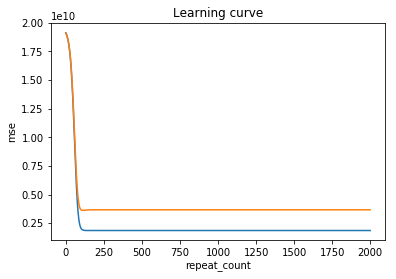

In [14]:
plot_learning_curve(clf.loss, clf.val_loss, clf.iter)